#Social_Network_Ads.csv

# Importing the libraries

In [1]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.tree import DecisionTreeClassifier

# Importing the dataset

In [2]:
df = pd.read_csv('Social_Network_Ads.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [3]:
df.drop('User ID', axis = 1, inplace = True)

In [4]:
labelen = LabelEncoder()
df['Gender'] = labelen.fit_transform(df['Gender'])

In [5]:
df

,Gender,Age,EstimatedSalary,Purchased
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0
3,0,27,57000,0
4,1,19,76000,0
...,...,...,...,...
395,0,46,41000,1
396,1,51,23000,1
397,0,50,20000,1
398,1,36,33000,0


# Splitting the dataset into the Training set and Test set

In [6]:
X = df.iloc[:,0:-1]
y = df.iloc[:,-1]

In [7]:
Xtrain , Xtest, ytrain,ytest = train_test_split(X,y, test_size= 0.2)

# Feature Scaling

In [8]:
sc = StandardScaler()
Xtrain = sc.fit_transform(Xtrain)
Xtest = sc.transform(Xtest)

# Fitting Decision Tree Classification to the Training set

In [9]:
dt = DecisionTreeClassifier()
dt.fit(Xtrain,ytrain)

DecisionTreeClassifier()

In [10]:
dt.score(Xtrain,ytrain)

0.996875

# Predicting the Test set results


In [11]:
ypred = dt.predict(Xtest)
ypred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

# Making the Confusion Matrix

In [12]:
from sklearn.metrics import confusion_matrix,plot_roc_curve,accuracy_score

In [13]:
confusion_matrix(ytest,ypred)

array([[50,  3],
       [ 7, 20]], dtype=int64)

In [14]:
accuracy_score(ytest,ypred)

0.875

# Visualising the Training set results

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


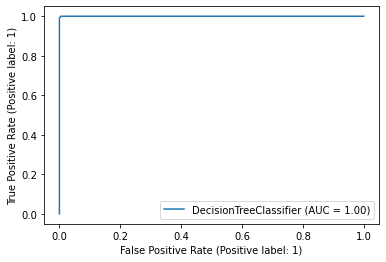

In [15]:
plot_roc_curve(dt, Xtrain,ytrain)